<a href="https://www.kaggle.com/code/aparecidinhagont/analise-dados-fitness?scriptVersionId=201167090" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#Importação de bibliotecas




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importação dos dados

In [2]:
df = pd.read_csv('/kaggle/input/data-to-learn-data-science/data.csv')

In [3]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


#Estatística descritiva

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [5]:
novas_colunas = {'Duration': 'Duracao(min)', 'Pulse': 'Fc', 'Maxpulse': 'Fcmax', 'Calories': 'Calorias'}
df.rename(columns=novas_colunas, inplace=True)

In [6]:
df.head(2)

,Duracao(min),Fc,Fcmax,Calorias
0,60,110,130,409.1
1,60,117,145,479.0


In [7]:
media = df['Duracao(min)'].mean().round()
print(f'Duração media: {media} minutos')

maximo= df['Duracao(min)'].max()
print(f'Duração máxima: {maximo} minutos')

minimo= df['Duracao(min)'].min()
print(f'Duração mínima: {minimo} minutos')

Duração media: 64.0 minutos
Duração máxima: 300 minutos
Duração mínima: 15 minutos


In [8]:
summary_stats= df.describe().round(2)
summary_stats

,Duracao(min),Fc,Fcmax,Calorias
count,169.00,169.00,169.00,164.00
mean,63.85,107.46,134.05,375.79
std,42.30,14.51,16.45,266.38
min,15.00,80.00,100.00,50.30
25%,45.00,100.00,124.00,250.92
50%,60.00,105.00,131.00,318.60
75%,60.00,111.00,141.00,387.60
max,300.00,159.00,184.00,1860.40


In [9]:
df.isnull().sum()

Duracao(min)    0
Fc              0
Fcmax           0
Calorias        5
dtype: int64

In [10]:
media_calorias= df.Calorias.mean().round(2)
media_calorias

375.79

In [11]:
df['Calorias'].fillna(media_calorias, inplace=True)

/tmp/ipykernel_17/943750227.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Calorias'].fillna(media_calorias, inplace=True)


In [12]:
df.isnull().sum()

Duracao(min)    0
Fc              0
Fcmax           0
Calorias        0
dtype: int64

In [13]:
correlation = df.corr(numeric_only = True)
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
              Duracao(min)        Fc     Fcmax  Calorias
Duracao(min)      1.000000 -0.155408  0.009403  0.921535
Fc               -0.155408  1.000000  0.786535  0.024962
Fcmax             0.009403  0.786535  1.000000  0.202376
Calorias          0.921535  0.024962  0.202376  1.000000


#Visualização gráfica

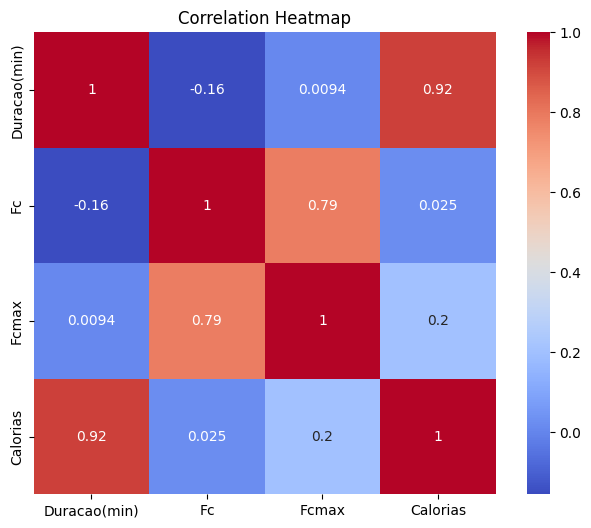

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

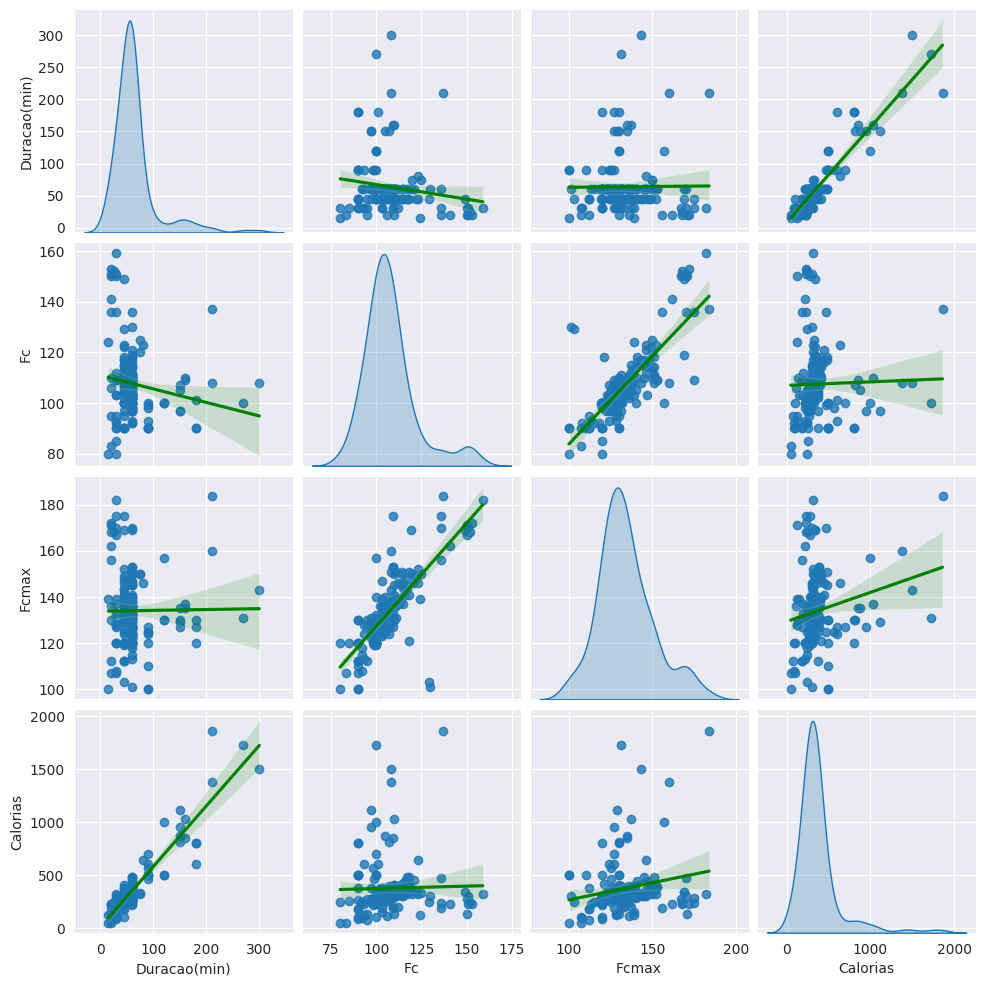

In [15]:
sns.set_style('darkgrid')

sns.pairplot(df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'green'}})


plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


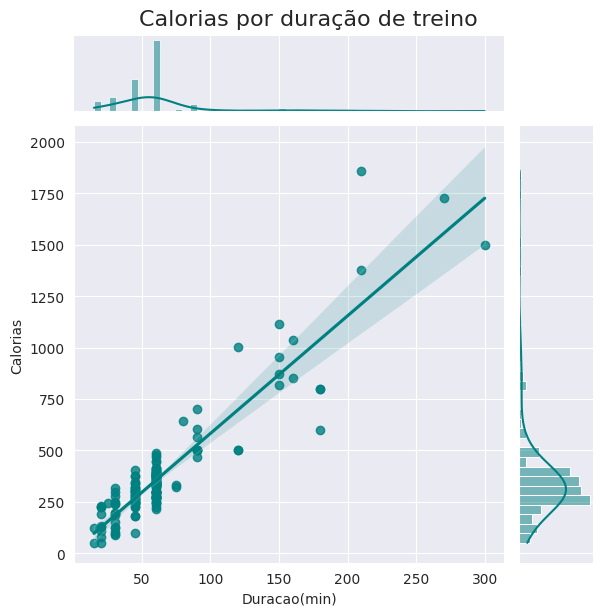

In [16]:
sns.jointplot(x='Duracao(min)', y='Calorias', data=df,  kind='reg', color='teal')
plt.suptitle('Calorias por duração de treino', y=1.02, fontsize=16)
plt.show()

In [17]:
duracao_index = df.set_index('Duracao(min)')

In [18]:
duracao_index

,Fc,Fcmax,Calorias
Duracao(min),,,
60,110,130,409.1
60,117,145,479.0
60,103,135,340.0
45,109,175,282.4
45,117,148,406.0
...,...,...,...
60,105,140,290.8
60,110,145,300.0
60,115,145,310.2


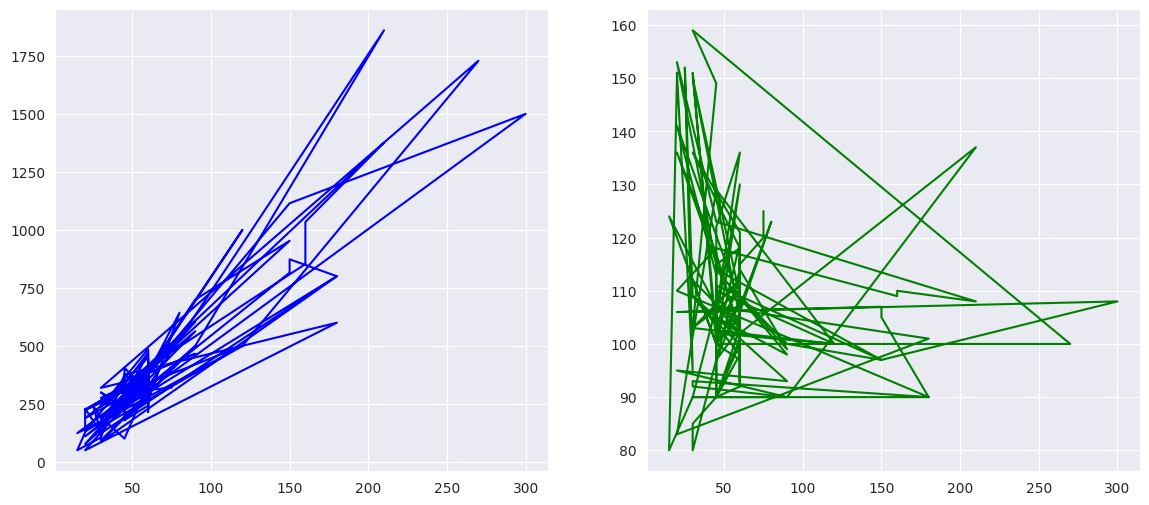

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (14,6))

axs[0].plot(duracao_index.index, duracao_index.Calorias, color='b')

axs[1].plot(duracao_index.index, duracao_index.Fc, color='g')

In [20]:
pd.set_option('display.max_rows', None)
df

,Duracao(min),Fc,Fcmax,Calorias
0,60,110,130,409.10
1,60,117,145,479.00
2,60,103,135,340.00
3,45,109,175,282.40
4,45,117,148,406.00
5,60,102,127,300.00
6,60,110,136,374.00
7,45,104,134,253.30
8,30,109,133,195.10
9,60,98,124,269.00


In [21]:
classes= [30, 90, 150, 300]
labels= ['curta-duracao', 'media-duracao', 'longa-duracao']
classificacao_duracao= pd.cut(x= df['Duracao(min)'], bins= classes, labels=labels, include_lowest= True).value_counts()

classificacao_duracao

Duracao(min)
curta-duracao    141
longa-duracao      9
media-duracao      7
Name: count, dtype: int64

In [22]:
df2= df['Duracao(min)'].value_counts().sort_index(ascending=True)
df2

Duracao(min)
15      2
20      9
25      1
30     16
45     35
60     79
75      2
80      1
90      8
120     3
150     4
160     2
180     3
210     2
270     1
300     1
Name: count, dtype: int64

In [23]:
por_duracao= df.groupby('Duracao(min)').mean().round()

por_duracao

,Fc,Fcmax,Calorias
Duracao(min),,,
15,102.0,120.0,87.0
20,125.0,146.0,152.0
25,152.0,168.0,244.0
30,110.0,137.0,192.0
45,107.0,133.0,279.0
60,106.0,133.0,341.0
75,122.0,150.0,325.0
80,123.0,146.0,643.0
90,94.0,116.0,542.0


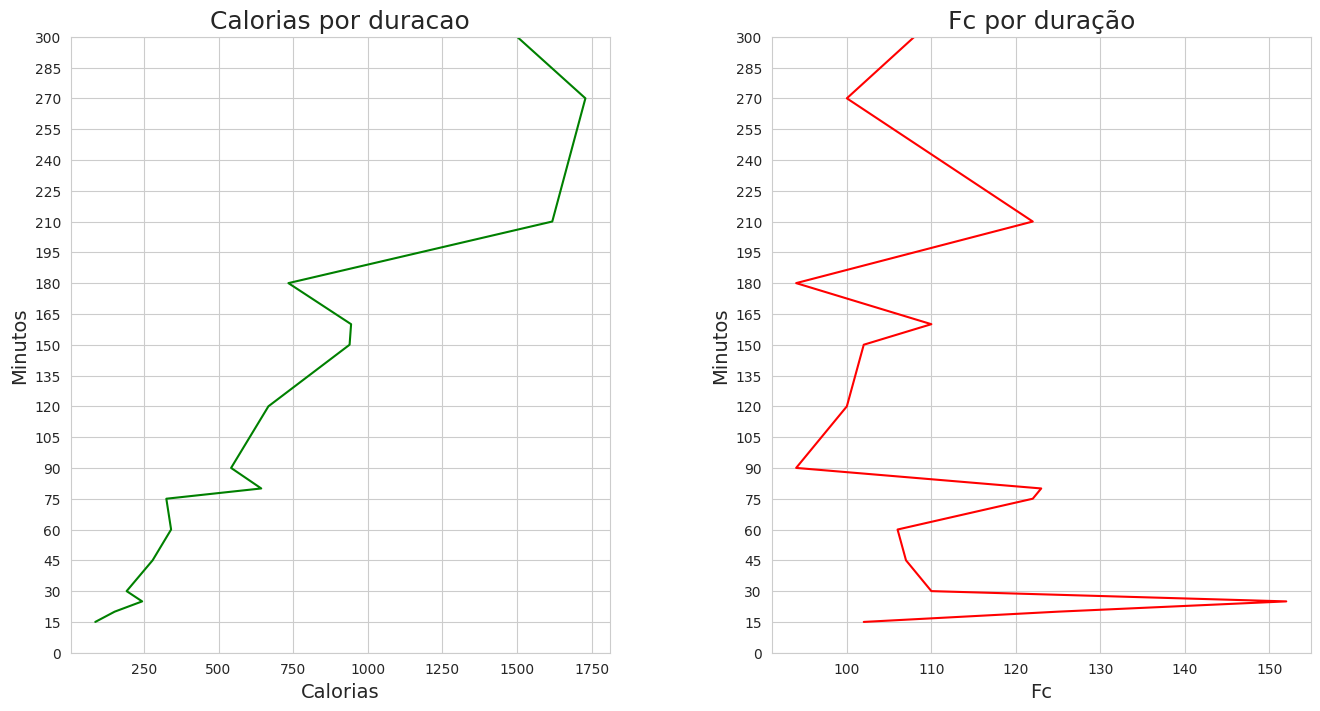

In [24]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(16,8))
fig.subplots_adjust(hspace= 0.5, wspace= 0.3)
fig.suptitle('', fontsize=18)



axs[0].plot(por_duracao.Calorias, por_duracao.index, color='g')
axs[0].set_title('Calorias por duracao',fontsize=18)
axs[0].set_ylim(0,300)
axs[0].set_xlabel('Calorias',fontsize=14)
axs[0].set_ylabel('Minutos',fontsize=14)

axs[1].plot(por_duracao.Fc, por_duracao.index, color='r')
axs[1].set_title('Fc por duração', fontsize=18)
axs[1].set_xlabel('Fc', fontsize=14)
axs[1].set_ylabel('Minutos',fontsize=14)
axs[1].set_ylim(0, 300)

for ax in axs.flat:
  ax.yaxis.set_major_locator(plt.MultipleLocator(15))

plt.show()

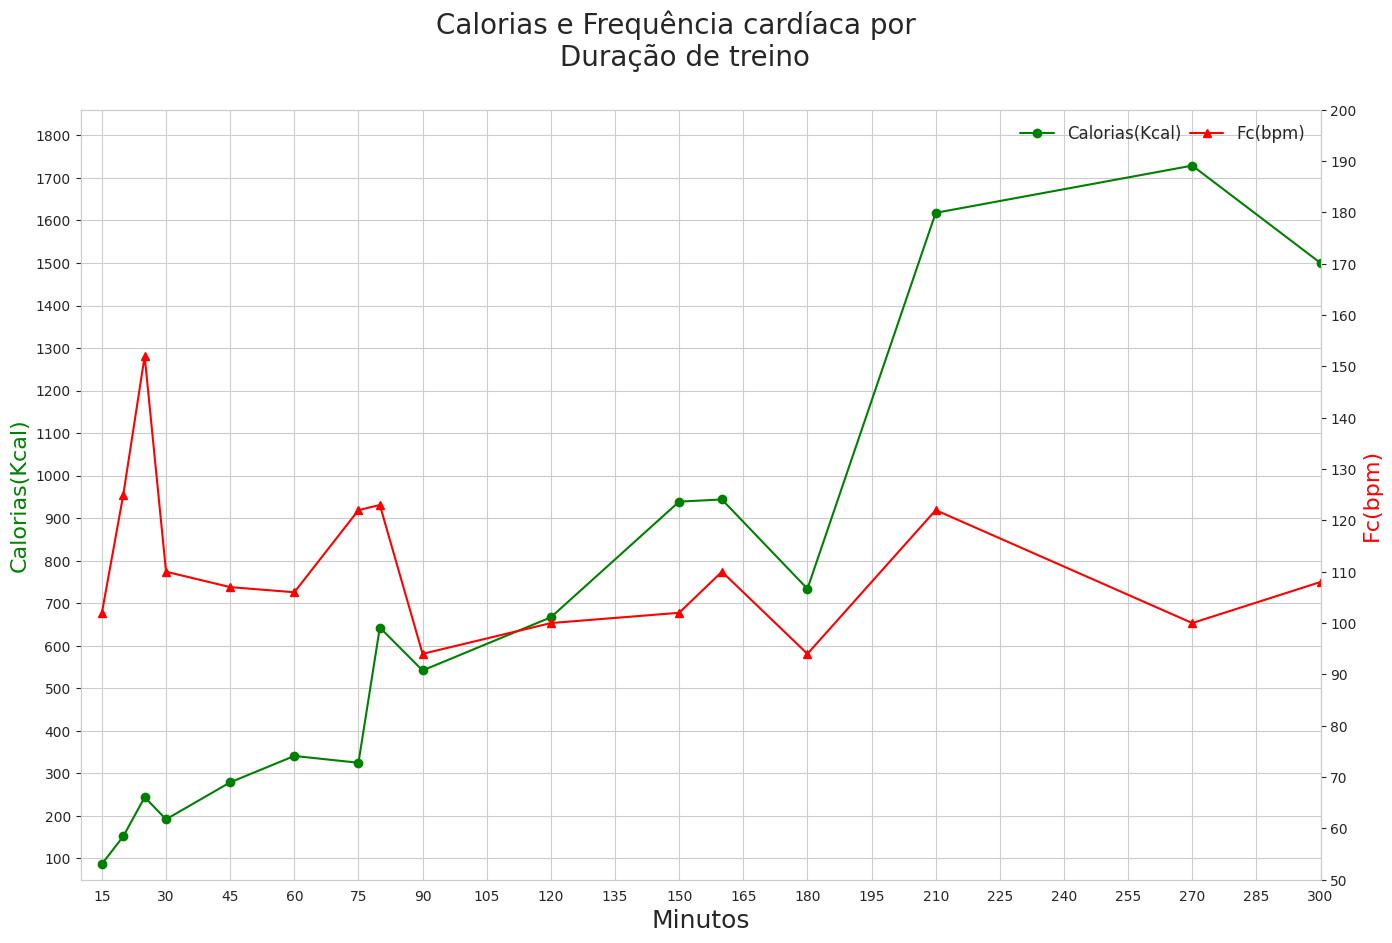

In [25]:
fig, ax1 = plt.subplots(figsize=(16, 10))
fig.suptitle('Calorias e Frequência cardíaca por \n Duração de treino', fontsize=20)

ax1.plot(por_duracao.index, por_duracao.Calorias, color= 'g', marker= 'o', label= 'Calorias(Kcal)')
ax1.set_xlabel('Minutos', fontsize=18)
ax1.set_ylabel('Calorias(Kcal)', fontsize=16, color='g')
ax1.set_ylim(50, 1860.40)
ax1.set_xlim(10, 300)
ax1.xaxis.set_major_locator(plt.MultipleLocator(15))
ax1.yaxis.set_major_locator(plt.MultipleLocator(100))
ax1.legend(loc= 'best',  frameon = False,  bbox_to_anchor=(0.9, 1), fontsize=12)


ax2= ax1.twinx()
ax2.plot(por_duracao.index, por_duracao.Fc, color= 'r', marker= '^', label='Fc(bpm)')
ax2.set_xlabel('Minutos')
ax2.set_ylabel('Fc(bpm)', fontsize=16, color='r')
ax2.set_ylim(50, 200)
ax2.set_xlim(10, 300)
ax2.xaxis.set_major_locator(plt.MultipleLocator(15))
ax2.yaxis.set_major_locator(plt.MultipleLocator(10))
ax2.grid(False)
ax2.legend(loc='best', frameon = False, fontsize=12)


plt.show()

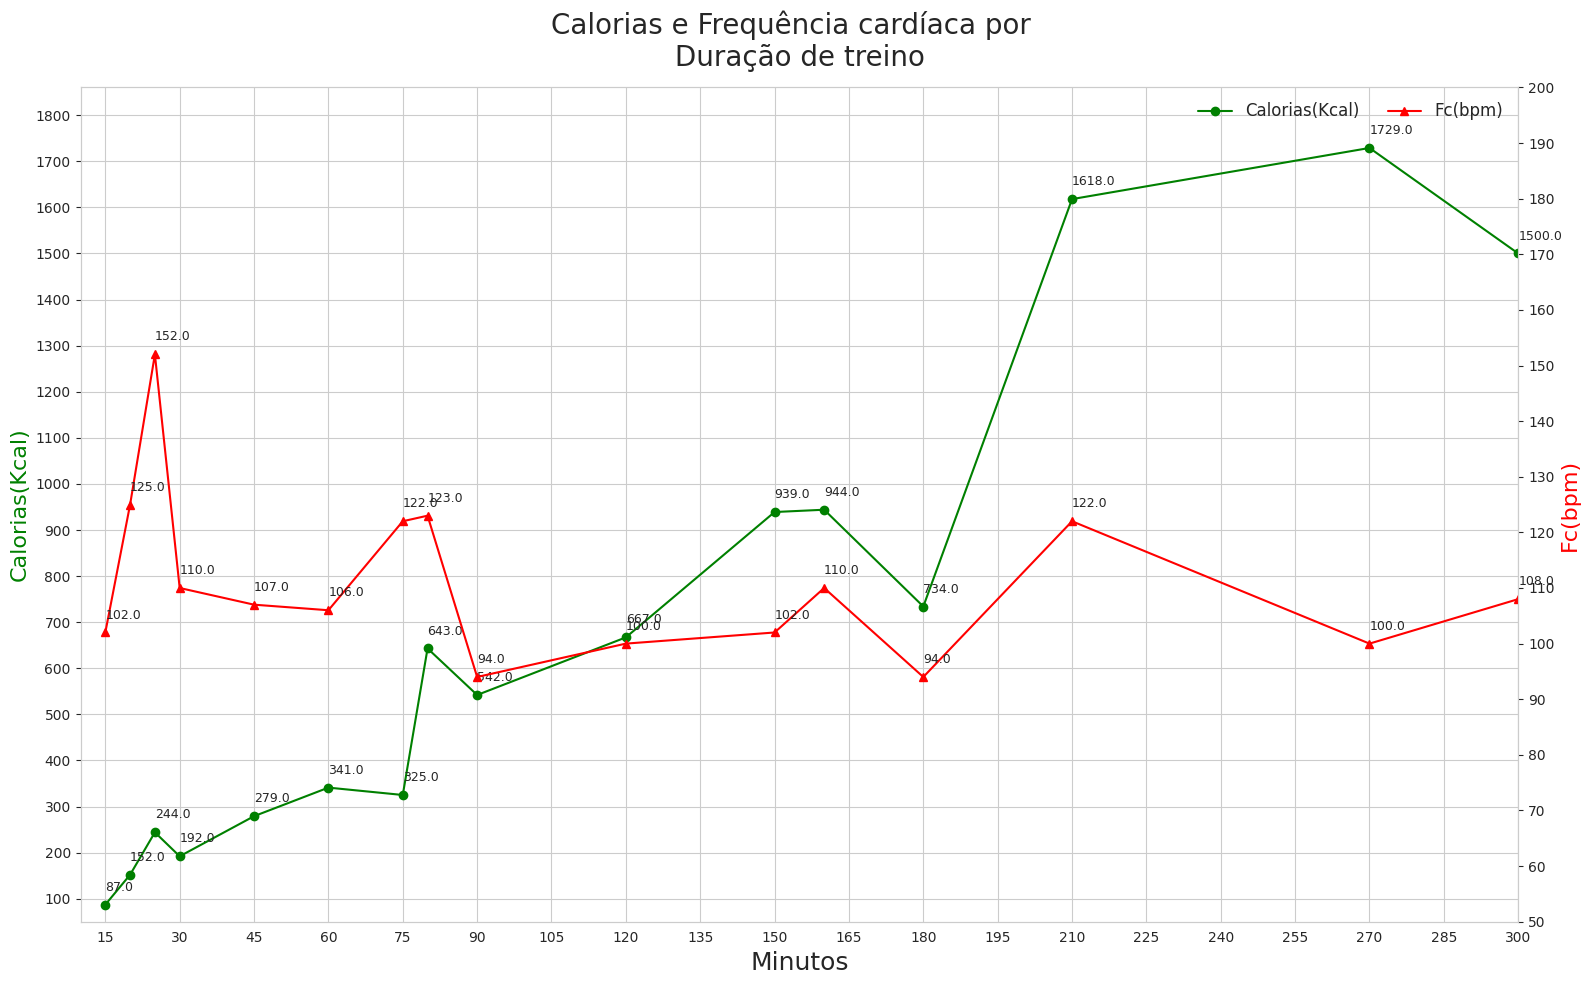

In [26]:
fig, ax1 = plt.subplots(figsize=(16, 10))
fig.suptitle('Calorias e Frequência cardíaca por \n Duração de treino', fontsize=20)

ax1.plot(por_duracao.index, por_duracao.Calorias, color= 'g', marker= 'o', label= 'Calorias(Kcal)')
ax1.set_xlabel('Minutos', fontsize=18)
ax1.set_ylabel('Calorias(Kcal)', fontsize=16, color='g')
ax1.set_ylim(50, 1860.40)
ax1.set_xlim(10, 300)
ax1.xaxis.set_major_locator(plt.MultipleLocator(15))
ax1.yaxis.set_major_locator(plt.MultipleLocator(100))
ax1.legend(loc= 'best',  frameon = False,  bbox_to_anchor=(0.9, 1), fontsize=12)

for i, value in enumerate(por_duracao.Calorias):
    x = por_duracao.index[i]
    y = value
    ax1.annotate(str(value), (x, y), textcoords="offset points", xytext=(0, 10), fontsize=9)

ax2= ax1.twinx()
ax2.plot(por_duracao.index, por_duracao.Fc, color= 'r', marker= '^', label='Fc(bpm)')
ax2.set_xlabel('Minutos')
ax2.set_ylabel('Fc(bpm)', fontsize=16, color='r')
ax2.set_ylim(50, 200)
ax2.set_xlim(10, 300)
ax2.xaxis.set_major_locator(plt.MultipleLocator(15))
ax2.yaxis.set_major_locator(plt.MultipleLocator(10))
ax2.grid(False)
ax2.legend(loc='best', frameon = False, fontsize=12)
for i, value in enumerate(por_duracao.Fc):
    x = por_duracao.index[i]
    y = value
    ax2.annotate(str(value), (x, y), textcoords="offset points", xytext=(0, 10), fontsize=9)

plt.tight_layout()
plt.show()

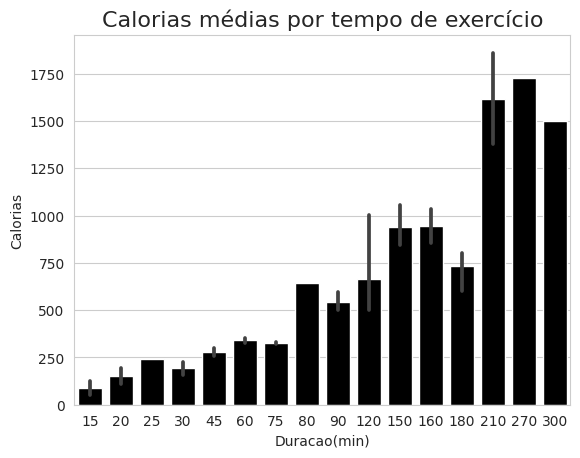

In [27]:
sns.barplot(duracao_index, x=duracao_index.index, y="Calorias",color='black').set_title("Calorias médias por tempo de exercício", fontsize=16)

plt.show()

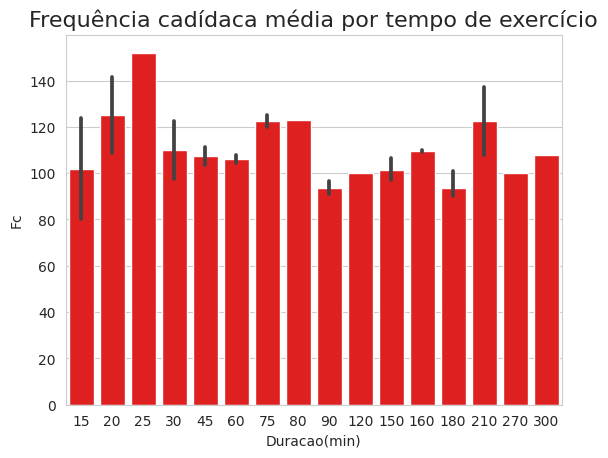

In [28]:
sns.barplot(duracao_index, x=duracao_index.index, y="Fc",color='r').set_title("Frequência cadídaca média por tempo de exercício", fontsize=16)
plt.show()

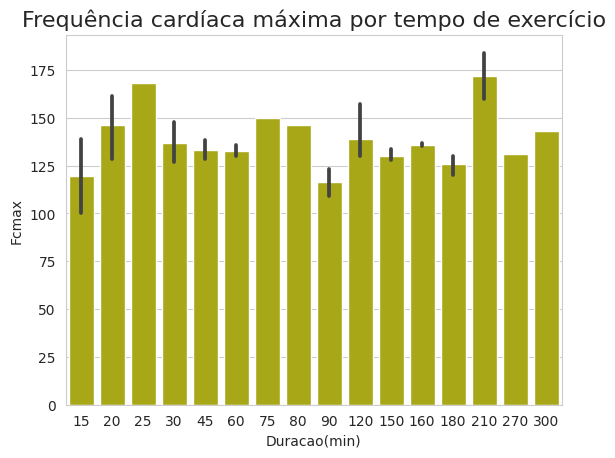

In [29]:
sns.barplot(duracao_index, x=duracao_index.index, y="Fcmax", color='y').set_title("Frequência cardíaca máxima por tempo de exercício", fontsize=16)
plt.show()